# creating the model

In [1]:
from tensorflow.keras.models import Sequential

In [4]:
import numpy as np
import pandas as pd

In [6]:
iris = pd.read_csv("./iris.csv")

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
X = iris.drop('species',axis=1)
y = iris['species']


In [10]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
encoder = LabelBinarizer()

In [14]:
y = encoder.fit_transform(y)  # converts the labels to one hot encoding

In [15]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [19]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler()

In [22]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(patience=5)

In [27]:
model.fit(scaled_X_train,y_train,epochs=300,validation_data=(scaled_X_test,y_test),
          callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 2s 54ms/step - loss: 1.2230 - accuracy: 0.3500 - val_loss: 1.3813 - val_accuracy: 0.2667
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2059 - accuracy: 0.3500 - val_loss: 1.3614 - val_accuracy: 0.2667
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1891 - accuracy: 0.3500 - val_loss: 1.3424 - val_accuracy: 0.2667
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1727 - accuracy: 0.3500 - val_loss: 1.3240 - val_accuracy: 0.2667
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1581 - accuracy: 0.3500 - val_loss: 1.3061 - val_accuracy: 0.2667
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1425 - accuracy: 0.3500 - val_loss: 1.2893 - val_accuracy: 0.2667
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1288 - accuracy: 0.3500 - val_loss: 1.2732 - val_accuracy: 0.2667
Epoch 8/300
4/4 [=========

In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.223007,0.35,1.381262,0.266667
1,1.205895,0.35,1.361450,0.266667
2,1.189138,0.35,1.342421,0.266667
3,1.172733,0.35,1.324033,0.266667
4,1.158083,0.35,1.306110,0.266667


<Axes: >

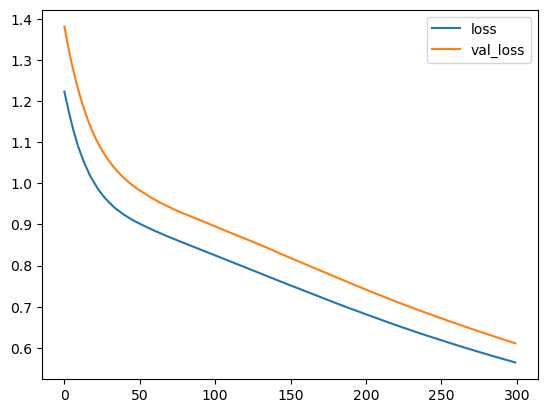

In [31]:
metrics[['loss','val_loss']].plot()

<Axes: >

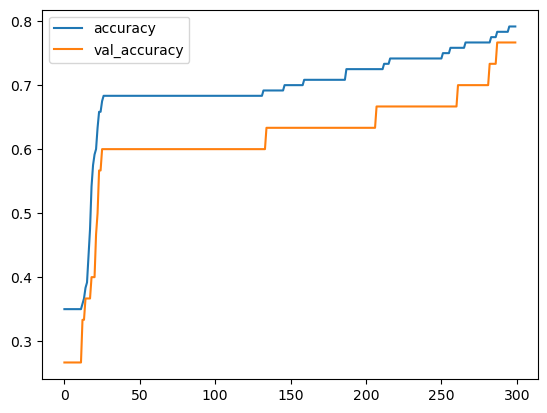

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [34]:
model.evaluate(scaled_X_test,y_test,verbose=0) # final loss and accuracy

[0.6110807061195374, 0.7666666507720947]

for the purpose of real world deployment, we train on the entire data

In [35]:
scaled_X = scaler.fit_transform(X)

In [36]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(scaled_X,y,epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 752us/step - loss: 1.1175 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 752us/step - loss: 1.1106 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 501us/step - loss: 1.1035 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 502us/step - loss: 1.0965 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 752us/step - loss: 1.0903 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0839 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 752us/step - loss: 1.0776 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 1ms/step - loss: 1.0713 - accuracy: 0.3333
Epoch 9/300
5/5 [==============================] - 0s 752us/step - loss: 1.0655 - accuracy: 0.3333
Epoch 10/300
5/5 [==============================] - 0s 752us/step - loss: 1.0595 - accuracy: 0.3333
Epoch 11/300


In [38]:
model.save("iris_final.h5")

In [39]:
# saving the scaler
import joblib

In [40]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

In [41]:
from tensorflow.keras.models import load_model

In [44]:
flower_model = load_model('./iris_final.h5')

In [45]:
flower_scaler = joblib.load('./iris_scaler.pkl')

# model prediction function

In [50]:
sample_json = {
    "sepal_length":5.1,
    "sepal_width":3.5,
    "petal_width":1.4,
    "petal_length":0.2
}

In [51]:
def return_prediction(model,scaler,sample_json):
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']

    flower = [[s_len,s_wid,p_len,p_wid]]

    flower = scaler.transform(flower)
    
    classes_array = np.array(['setosa', 'versicolor', 'virginica'])
    class_ind =  np.argmax(model.predict(flower))

    return classes_array[class_ind]

In [52]:
print(return_prediction(flower_model,flower_scaler,sample_json))

1/1 [==============================] - 0s 86ms/step
setosa


c:\Users\viren\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [54]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# code for deployment

In [55]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

In [56]:
flower_model = load_model('./iris_final.h5')
flower_scaler = joblib.load('./iris_scaler.pkl')

In [57]:
def return_prediction(model,scaler,sample_json):
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']

    flower = [[s_len,s_wid,p_len,p_wid]]

    flower = scaler.transform(flower)
    
    classes_array = np.array(['setosa', 'versicolor', 'virginica'])
    class_ind =  np.argmax(model.predict(flower))

    return classes_array[class_ind]